In [1]:
from sec_api import ExecCompApi

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
execCompApi = ExecCompApi('324614ace318064f2aa8dcd8ca0f8c5e79647f3dd5b45be7afcadca465924e6a')

In [3]:
result_ticker = execCompApi.get_data('AAPL')

In [11]:
len(result_ticker)

96

In [17]:
result_ticker[0].keys()

dict_keys(['id', 'cik', 'ticker', 'name', 'position', 'year', 'salary', 'bonus', 'stockAwards', 'optionAwards', 'nonEquityIncentiveCompensation', 'otherCompensation', 'total'])

In [18]:
result_ticker[0].values()

dict_values(['21bce6f864ee3d67e61232da5e371dcc', '320193', 'AAPL', 'Jeff Williams', 'Chief Operating Officer', 2021, 1000000, 0, 21959620, 0, 4000000, 17437, 26977057])

In [24]:
for key in result_ticker[0].keys():
    print(key, result_ticker[0][key])

id 21bce6f864ee3d67e61232da5e371dcc
cik 320193
ticker AAPL
name Jeff Williams
position Chief Operating Officer
year 2021
salary 1000000
bonus 0
stockAwards 21959620
optionAwards 0
nonEquityIncentiveCompensation 4000000
otherCompensation 17437
total 26977057


In [48]:
aapl_mainpay_df = pd.DataFrame(result_ticker)

Chief Executive Officer                                                     19
Senior Vice President, Chief Financial Officer                              13
Senior Vice President, General Counsel and Secretary                        10
Senior Vice President, Internet Software and Services                        9
Chief Operating Officer                                                      8
Senior Vice President, Retail                                                6
Senior Vice President, Hardware Engineering                                  6
Senior Vice President, Operations                                            5
Senior Vice President, Retail + People                                       3
Senior Vice President, Retail and Online Stores                              2
Senior Vice President, iOS Software                                          2
Senior Vice President, Mac Hardware Engineering                              2
Senior Vice President and Chief Financial Officer   

<AxesSubplot:xlabel='year', ylabel='salary'>

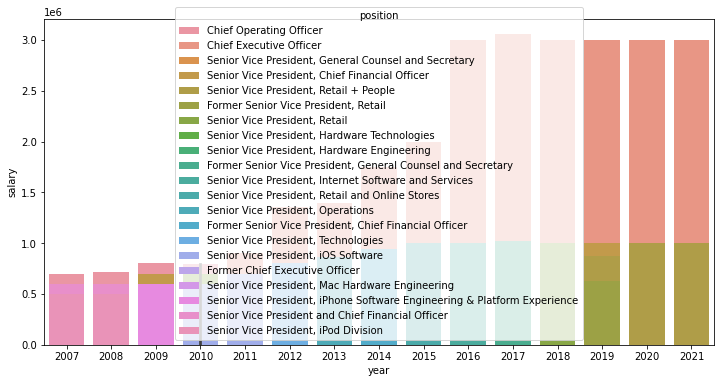

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data=aapl_mainpay_df,x='year',y='salary',hue='position',dodge=False)

In [59]:
aapl_mainpay_df.to_csv('SCT_datasets/AAPL_SCTpay.csv',index=False)